In [1]:
 # 1. Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 2. Load the dataset (replace 'your_file.csv' with your actual file name or path)
df = pd.read_csv('titanic.csv')  # Example: 'titanic.csv'

# 3. Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# 4. Check for null values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 5. Fill missing numeric values with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# 6. Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 7. Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 8. Normalize numeric features using StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 9. Final processed data preview
print("\nPreprocessed dataset:")
print(df.head())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

/tmp/ipython-input-1-3825763091.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1-3825763091.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Define features and target (dropping 'Survived' as target)
X = df.drop(columns=["Survived"])
y = df["Survived"]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shape of the split data
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)




Training set shape: (712, 11)
Test set shape: (179, 11)


In [3]:
 # Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load Titanic dataset (or any dataset)
from sklearn.datasets import fetch_openml
titanic = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic.frame.copy()

# Preprocessing: Drop rows with missing target or features
df = df[['age', 'fare']].dropna()  # Using 'age' to predict 'fare' (example)
X = df[['age']]
y = df['fare']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])



Intercept: 15.301523145385357
Coefficient: 0.7190886804222967


In [4]:
 # 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load dataset (Titanic dataset as example)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 3. Preprocess dataset
# Drop rows with missing 'Age'
df = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].dropna()

# Features and target
X = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]  # Independent variables
y = df['Survived']  # Dependent variable

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 8. Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.39055920959319484
Mean Squared Error (MSE): 0.19868231481764162
R² Score: 0.16608073569253823


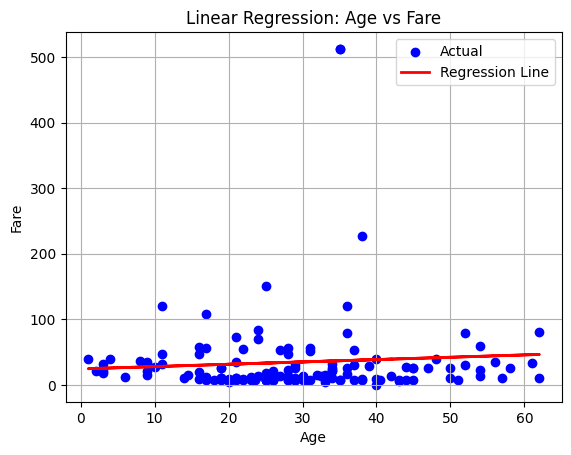

Intercept (β0): 24.389625818900655
Coefficient (β1 for Age): 0.3560968010123723


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Drop rows with missing values in Age and Fare
df = df[['Age', 'Fare']].dropna()

# Define features and target
X = df[['Age']]
y = df['Fare']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Plot regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Linear Regression: Age vs Fare')
plt.legend()
plt.grid(True)
plt.show()

# Coefficient interpretation
print(f"Intercept (β0): {model.intercept_}")
print(f"Coefficient (β1 for Age): {model.coef_[0]}")